In [19]:
import pandas as pd
import numpy as np
import json
import pprint


In [4]:
df = pd.read_csv('san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv')


In [5]:
df.shape

(1605957, 7)

In [174]:
decDf = df.loc[df['month'] == 12]
reducedDf = decDf[['sourceid','dstid','mean_travel_time']]
print(reducedDf.shape)

(538998, 3)


In [175]:
from collections import OrderedDict
networkDict = OrderedDict()
for index, row in reducedDf.iterrows():
    source = int(row['sourceid'])
    dest = int(row['dstid'])
    weight = float(row['mean_travel_time'])
    if dest < source:
        source, dest = dest, source
    key = str(source)+"#"+str(dest)
    if key in networkDict:
        curWeight = networkDict[key]
        newWeight = float(curWeight + weight)/2
        networkDict[key] = newWeight
    else:
        networkDict[key] = weight
            
        


In [185]:
len(networkDict)
# for k in networkDict:
#     print(k,networkDict[k])

311812

In [180]:
abc = "123#456"
temp = abc.split('#')
int(temp[0])

123

In [188]:
# graphDf = pd.DataFrame(columns=['V1', 'V2', 'weight'])
graphNp = np.zeros((len(networkDict), 3))
idx = 0
for k in networkDict:
    idList = k.split('#')
    graphNp[idx][0] = int(idList[0])
    graphNp[idx][1] = int(idList[1])
    graphNp[idx][2] = float(networkDict[k])
    
#     graphDf.loc[idx] = [s, d, val]
    idx+=1

In [194]:
print(graphNp.shape)
graphDf = pd.DataFrame(graphNp, columns=['V1', 'V2', 'weight'])
graphDf.V1 = graphDf.V1.astype(int)
graphDf.V2 = graphDf.V2.astype(int)
print(len(graphDf))
graphDf

(311812, 3)
311812


,V1,V2,weight
0,1938,1952,571.220
1,629,1747,1366.535
2,1872,1919,1149.750
3,1871,1929,950.190
4,81,2319,512.365
5,1873,1909,1164.510
6,232,809,3085.170
7,1729,1891,2089.535
8,62,2423,1977.895
9,650,1829,2918.590


In [197]:
print(graphDf.shape)

(311812, 3)


In [198]:
print(graphDf['V1'].max())
print(graphDf['V2'].max())


2700
2709


In [199]:
edgeListFile = "uber_edgeList_v1.csv"
graphDf.to_csv(edgeListFile, sep=',', encoding='utf-8', index=False)


In [ ]:
# nDuplicates = 0 
# for index1, row in reducedDf.iterrows():
#     s1 = row['sourceid']
#     d1 = row['dstid']
#     val1 = row['mean_travel_time']
# #     print("sour",s1,d1,val1)

#     tempDf = reducedDf.loc[(reducedDf['sourceid'] == d1) & (reducedDf['dstid'] == s1)]
#     if len(tempDf) != 0:
#         nDuplicates += 1
#         for index2, row2 in tempDf.iterrows():
#             s2 = row2['sourceid']
#             d2 = row2['dstid']
#             val2 = row2['mean_travel_time']
# #             print("dest",s2,d2,val2)
            
#             avgVal = float(val1 + val2)/2
#             reducedDf.at[index1, 'mean_travel_time'] = avgVal
#             reducedDf = reducedDf.drop(index2)
# #             print(reducedDf.loc[index1])
# #             print(reducedDf.loc[index2])

            
# #     else:
# #         print("no duplicate")

In [112]:
filename = "san_francisco_censustracts.json"
with open(filename, 'r') as f:
    geoData = json.load(f)

In [ ]:
# geoData["features"]

In [212]:
geoData["features"][2]

{u'geometry': {u'coordinates': [[[[-121.679781, 37.158594],
     [-121.671983, 37.164063],
     [-121.670184, 37.165278],
     [-121.66749, 37.167032],
     [-121.663253, 37.162396],
     [-121.655618, 37.156437],
     [-121.645075, 37.145542],
     [-121.640905, 37.141237],
     [-121.64082, 37.14115],
     [-121.642424, 37.139813],
     [-121.64338, 37.13904],
     [-121.65269, 37.13173],
     [-121.66269, 37.14148],
     [-121.66333, 37.14345],
     [-121.66718, 37.14628],
     [-121.677079, 37.155975],
     [-121.679781, 37.158594]]]],
  u'type': u'MultiPolygon'},
 u'properties': {u'DISPLAY_NAME': u'18300 Sutter Boulevard, Morgan Hill',
  u'MOVEMENT_ID': u'3'},
 u'type': u'Feature'}

In [213]:
coordList = geoData["features"][2]["geometry"]["coordinates"][0][0]
print(coordList)

[[-121.679781, 37.158594], [-121.671983, 37.164063], [-121.670184, 37.165278], [-121.66749, 37.167032], [-121.663253, 37.162396], [-121.655618, 37.156437], [-121.645075, 37.145542], [-121.640905, 37.141237], [-121.64082, 37.14115], [-121.642424, 37.139813], [-121.64338, 37.13904], [-121.65269, 37.13173], [-121.66269, 37.14148], [-121.66333, 37.14345], [-121.66718, 37.14628], [-121.677079, 37.155975], [-121.679781, 37.158594]]


In [215]:
coordNp = np.array(coordList)
print(coordNp)
meanLoc = np.mean(coordNp, axis=0)
print(meanLoc)


[[-121.679781   37.158594]
 [-121.671983   37.164063]
 [-121.670184   37.165278]
 [-121.66749    37.167032]
 [-121.663253   37.162396]
 [-121.655618   37.156437]
 [-121.645075   37.145542]
 [-121.640905   37.141237]
 [-121.64082    37.14115 ]
 [-121.642424   37.139813]
 [-121.64338    37.13904 ]
 [-121.65269    37.13173 ]
 [-121.66269    37.14148 ]
 [-121.66333    37.14345 ]
 [-121.66718    37.14628 ]
 [-121.677079   37.155975]
 [-121.679781   37.158594]]
[-121.66021547   37.15047594]


In [41]:
geoData["features"][0]["properties"]["DISPLAY_NAME"]

u'400 Northumberland Avenue, Redwood Oaks, Redwood City'

In [60]:
geoData["features"][0]["properties"]["MOVEMENT_ID"]

u'1'

In [50]:
len(geoData["features"])

2710

In [59]:
for i in range(0,len(geoData["features"])):
    if i+1 != int(geoData["features"][i]["properties"]["MOVEMENT_ID"]):
        print(i)

In [217]:
# filterGeoData = dict()
geoDataDf = pd.DataFrame(columns=['id', 'display_name', 'location_lat','location_lon'])
# >>> for i in range(5):
# >>>     df.loc[i] = [np.random.randint(-1,1) for n in range(3)]
for idx in range(0,len(geoData["features"])):
    mId = int(geoData["features"][idx]["properties"]["MOVEMENT_ID"])
    displayName = geoData["features"][idx]["properties"]["DISPLAY_NAME"]
    coOrdList = geoData["features"][idx]["geometry"]["coordinates"][0][0]
    coOrdNp = np.array(coOrdList)
    meanLocation = np.mean(coOrdNp, axis=0)
    geoDataDf.loc[idx] = [mId, displayName, meanLocation[0], meanLocation[1]]

In [218]:
geoDataDf

,id,display_name,location_lat,location_lon
0,1,"Sargent Creek, San Ardo",-120.788685,36.071629
1,2,"400 Northumberland Avenue, Redwood Oaks, Redwo...",-122.219406,37.469585
2,3,"18300 Sutter Boulevard, Morgan Hill",-121.660215,37.150476
3,4,"2700 Stoughton Way, Sheffield, Sacramento",-121.342846,38.573074
4,5,"3200 Huntsman Drive, Rosemont Park, Sacramento",-121.361714,38.554435
5,6,"100 Carlsbad Circle, Vacaville",-121.948432,38.366653
6,7,"Unnamed Road, Vacaville",-121.996104,38.325847
7,8,"700 Carlsbad Court, Petaluma",-122.644972,38.261877
8,9,"500 Hyde Street, Tenderloin, San Francisco",-122.416533,37.785703
9,10,"3200 Nightingale Drive, Modesto",-121.060020,37.694177


In [219]:
geoDataFile = "geoData_v1.csv"
geoDataDf.to_csv(geoDataFile, sep='\t', encoding='utf-8', index=False)


### QUESTION 11

In [229]:
with open('uberNetworkNodes_v1.csv') as f:
    uberNetworkNodes = f.read().splitlines()
uberNetworkNodes = uberNetworkNodes[1:]

uberNetworkNodes = [ int(x) for x in uberNetworkNodes ]
print(uberNetworkNodes)
len(uberNetworkNodes)

[1938, 629, 1872, 1871, 81, 1873, 232, 1729, 62, 650, 680, 542, 604, 660, 1329, 82, 739, 1192, 550, 1308, 1518, 176, 889, 536, 74, 288, 169, 99, 549, 646, 528, 458, 608, 111, 641, 108, 64, 809, 128, 722, 612, 98, 464, 624, 614, 151, 268, 644, 649, 744, 394, 434, 234, 224, 554, 289, 222, 610, 544, 284, 315, 829, 251, 388, 1755, 1748, 954, 1386, 1726, 1296, 1749, 338, 1745, 613, 175, 535, 1451, 647, 65, 387, 859, 1739, 1808, 818, 1692, 738, 695, 685, 682, 817, 339, 605, 153, 609, 264, 272, 1287, 397, 1409, 1437, 1257, 1471, 131, 1571, 347, 1271, 822, 1359, 422, 152, 2113, 380, 832, 370, 742, 2049, 277, 1258, 369, 1297, 52, 2110, 1269, 385, 1438, 1277, 165, 2111, 123, 1259, 446, 445, 285, 69, 478, 1032, 431, 602, 322, 286, 885, 595, 452, 225, 676, 155, 447, 194, 665, 334, 209, 1090, 1691, 675, 448, 597, 42, 950, 100, 221, 417, 1064, 60, 235, 702, 1284, 617, 80, 1332, 2322, 2202, 919, 2132, 827, 469, 25, 888, 659, 345, 594, 929, 627, 58, 1852, 1850, 38, 1526, 907, 927, 1736, 91, 1510, 1838

1880

In [241]:
geoDataDfFilter = geoDataDf.loc[geoDataDf['id'].isin(uberNetworkNodes)]
geoDataDfFilter = geoDataDfFilter.reset_index(drop=True)
print(len(geoDataDfFilter))
geoDataDfFilter

1880


,id,display_name,location_lat,location_lon
0,2,"400 Northumberland Avenue, Redwood Oaks, Redwo...",-122.219406,37.469585
1,3,"18300 Sutter Boulevard, Morgan Hill",-121.660215,37.150476
2,5,"3200 Huntsman Drive, Rosemont Park, Sacramento",-121.361714,38.554435
3,6,"100 Carlsbad Circle, Vacaville",-121.948432,38.366653
4,7,"Unnamed Road, Vacaville",-121.996104,38.325847
5,8,"700 Carlsbad Court, Petaluma",-122.644972,38.261877
6,9,"500 Hyde Street, Tenderloin, San Francisco",-122.416533,37.785703
7,10,"3200 Nightingale Drive, Modesto",-121.060020,37.694177
8,11,"0 Mesa Vista Court, San Ramon",-121.974941,37.764186
9,12,"Gate 1 Entrance Road, Calistoga",-122.578828,38.581276


In [284]:
geoDataLocNp = geoDataDfFilter.as_matrix(columns=geoDataDfFilter.columns[2:4])
print(len(geoDataLocNp))
print(geoDataLocNp[0])
print(geoDataLocNp[1441])
print(geoDataDfFilter.loc[1441])
print(geoDataDfFilter.loc[547]['id'])

print(geoDataLocNp[1879])

geoDataLocNp

1880
[-122.21940574   37.46958495]
[-123.0167705    38.80944199]
id                                2073
display_name    Kelly Road, Cloverdale
location_lat                  -123.017
location_lon                   38.8094
Name: 1441, dtype: object
806
[-121.56338891   38.567786  ]


array([[-122.21940574,   37.46958495],
       [-121.66021547,   37.15047594],
       [-121.36171355,   38.5544347 ],
       ..., 
       [-121.46691952,   38.39466237],
       [-122.44114865,   37.66268815],
       [-121.56338891,   38.567786  ]])

In [258]:
points = np.array(geoDataLocNp)
from scipy.spatial import Delaunay
tri = Delaunay(points)
print(tri.simplices)


[[1441  547  795]
 [ 976 1407  402]
 [ 795 1653  402]
 ..., 
 [ 876 1600   84]
 [ 876  310 1733]
 [ 878  876 1733]]


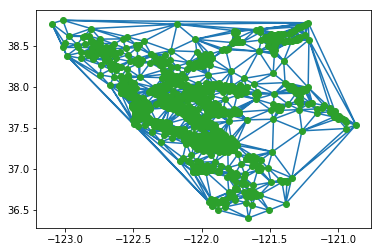

In [261]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [267]:
delaunayAllTri = tri.simplices.copy()
print(delaunayAllTri)


[[1441  547  795]
 [ 976 1407  402]
 [ 795 1653  402]
 ..., 
 [ 876 1600   84]
 [ 876  310 1733]
 [ 878  876 1733]]


In [283]:
from collections import OrderedDict
flowEdgeListFilename = "flow_edgeList_v1.csv"
flowEdgeListFile = open(flowEdgeListFilename,"w")
flowEdgeListFile.write("V1,V2\n")


flowEdgeListDict = OrderedDict()
for triangle in delaunayAllTri:
    for combi in [[0,1],[0,2],[1,2]]:
        sourceIdx = triangle[combi[0]]
        destIdx = triangle[combi[1]]
        source = geoDataDfFilter.loc[sourceIdx]['id']
        dest = geoDataDfFilter.loc[destIdx]['id']

#         print(source, dest)
        if dest < source:
            source, dest = dest, source
        key = str(source)+"#"+str(dest)
        if key not in flowEdgeListDict:
            edge = str(source)+","+str(dest)+"\n"
            flowEdgeListFile.write(edge)
            flowEdgeListDict[key]=1

flowEdgeListFile.close()
#         print(combi[1])
#     source = int(row['sourceid'])
#     dest = int(row['dstid'])
#     weight = float(row['mean_travel_time'])
#     if dest < source:
#         source, dest = dest, source
#     key = str(source)+"#"+str(dest)
#     if key in networkDict:
#         curWeight = networkDict[key]
#         newWeight = float(curWeight + weight)/2
#         networkDict[key] = newWeight
#     else:
#         networkDict[key] = weight